In [1]:
from astropy.io import fits
from astropy import units, constants
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import corner
from voigt_fit_lib import *
import os
import pickle

Load in the files

In [2]:
rootdir = '/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/'

First, the FUV files

In [3]:
spec_fits_fuv = fits.open(rootdir + 'FUV/PG1522+101_FUV_wavecal_new.fits')
nodes_fits_fuv = fits.open(rootdir + 'FUV/PG1522+101_FUV_wavecal_new_nodes.fits')
ids_fits_fuv = fits.open(rootdir + 'FUV/PG1522+101_FUV_wavecal_new_identifications.fits')
lsf_fits_fuv = fits.open(rootdir + 'FUV/PG1522_COS_FUV_wavcal2022_lsf_ZQ.fits')

Then, the NUV files

In [4]:
spec_fits_nuv = fits.open(rootdir + 'G185M/PG1522+101_NUV_wavecal_new.fits')
nodes_fits_nuv = fits.open(rootdir + 'G185M/PG1522+101_NUV_wavecal_new_nodes.fits')
ids_fits_nuv = fits.open(rootdir + 'G185M/PG1522+101_NUV_wavecal_new_identifications.fits')
lsf_fits_nuv = fits.open(rootdir + 'G185M/PG1522_COS_NUV_wavcal2022_lsf.fits')

Then, the STIS files

In [5]:
spec_fits_stis = fits.open(rootdir + 'STIS/PG1522+101_E230M_new.fits')
nodes_fits_stis = fits.open(rootdir + 'STIS/PG1522+101_E230M_new_nodes.fits')
ids_fits_stis = fits.open(rootdir + 'STIS/PG1522+101_E230M_new_identifications.fits')
lsf_fits_stis = fits.open(rootdir + 'STIS/PG1522_STIS_NUV_wavcal2022_lsf.fits')

Compile a list of the spectra, continuum nodes, and IDs for all detectors

In [6]:
spec_fits_list = [spec_fits_fuv, spec_fits_nuv, spec_fits_stis]
nodes_fits_list = [nodes_fits_fuv, nodes_fits_nuv, nodes_fits_stis]
ids_fits_list = [ids_fits_fuv, ids_fits_nuv, ids_fits_stis]
lsf_fits_list = [lsf_fits_fuv, lsf_fits_nuv, lsf_fits_stis]

Load in the ions table for atomic data

In [7]:
atomic_data_table = np.loadtxt('/Users/thepoetoftwilight/Documents/CUBS/pabs0/data/linelists/atom.dat', dtype=str)

Get OIV554 in COS FUV

In [8]:
oiv_554_fuv = ion_transition('OIV554', 121, 'FUV')

In [9]:
oiv_554_fuv.grab_ion_transition_info(ids_fits_list, atomic_data_table)

In [10]:
oiv_554_fuv.grab_ion_transition_spec(spec_fits_list, v_range=[-200,200])

In [11]:
oiv_554_fuv.cont_norm_flux(nodes_fits_list, renorm=True, v_abs_range=[-100,100], degree=1)

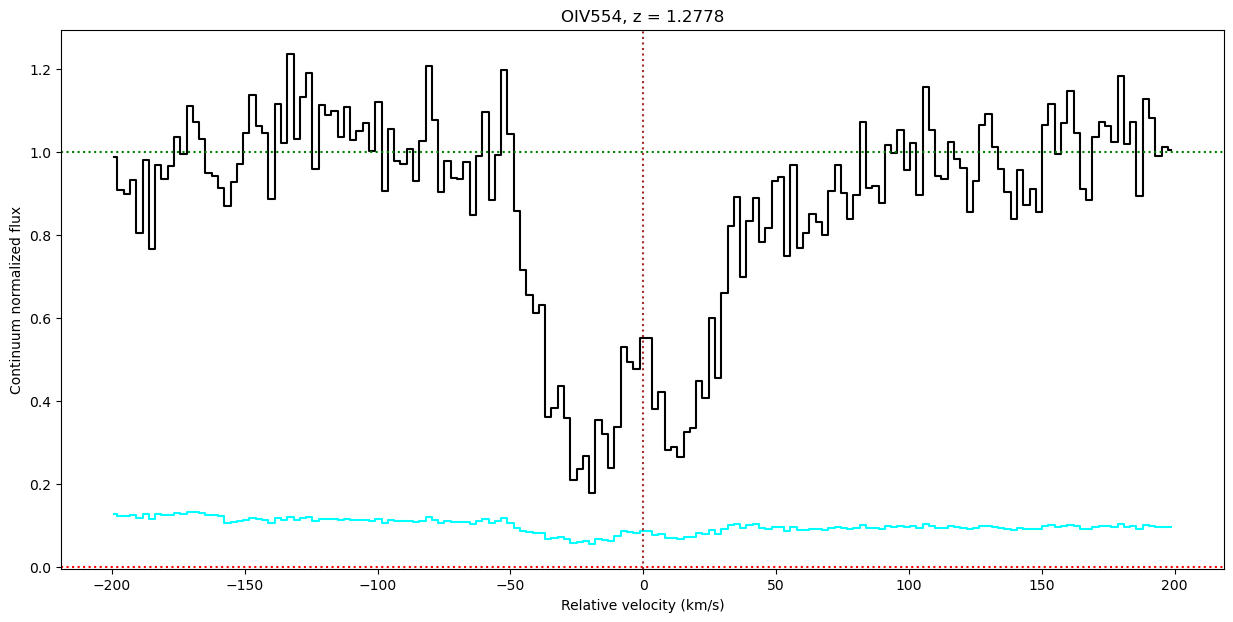

In [12]:
fig, ax = plt.subplots(1, figsize=(15,7))

oiv_554_fuv.plot_ion_transition_spec(ax)

In [13]:
oiv_554_fuv.grab_ion_transition_lsf(lsf_fits_list)

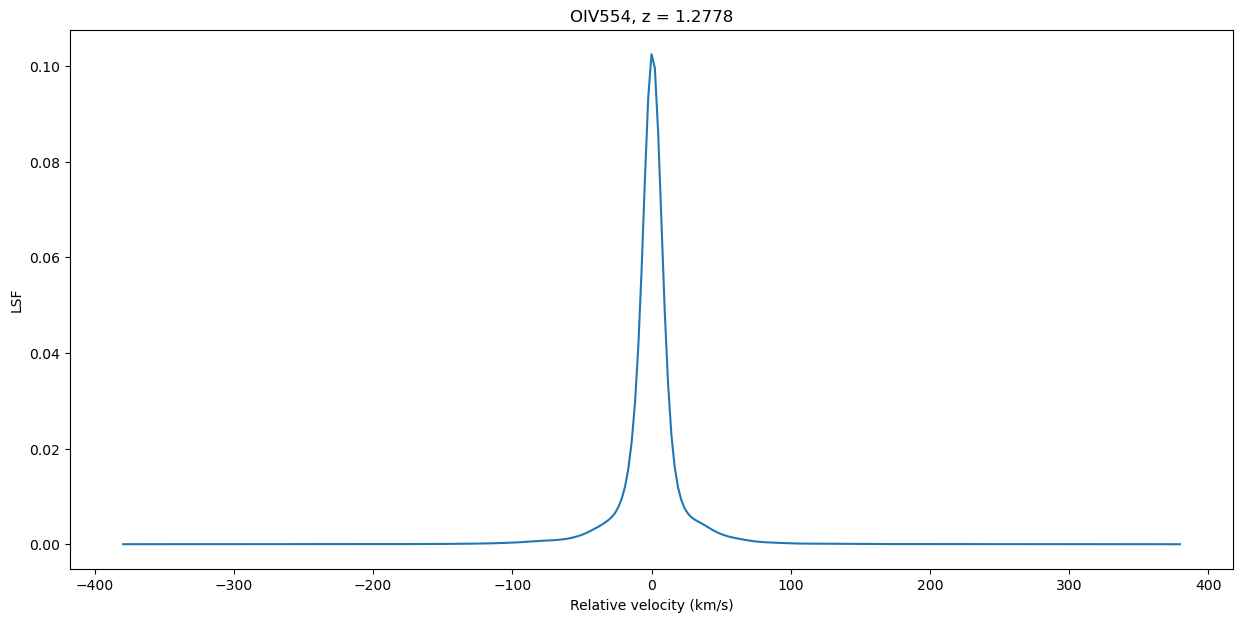

In [14]:
fig, ax = plt.subplots(1, figsize=(15, 7))

oiv_554_fuv.plot_ion_transition_lsf(ax)

In [15]:
oiv_554_fuv.init_multi_voigt(init_values = np.array([[14.4, 7, -20.5], 
                                                     [14.2, 7, 17]]), 
                             lsf_convolve = True)

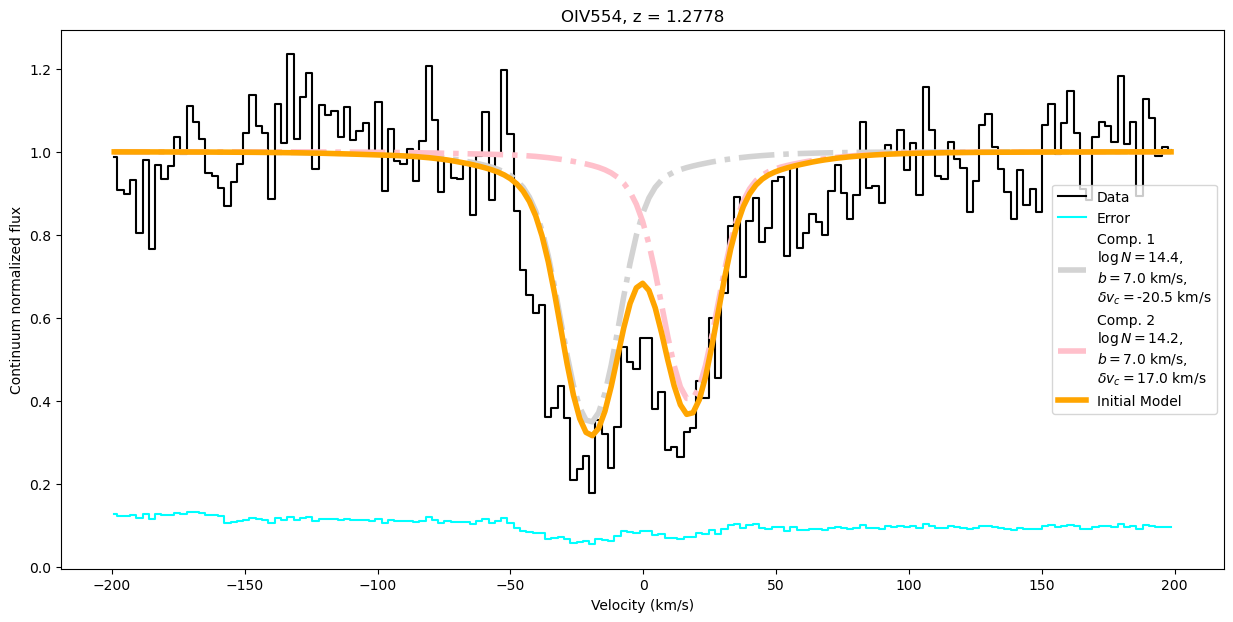

In [16]:
fig, ax = plt.subplots(1, figsize=(15, 7))

oiv_554_fuv.plot_init_profile(ax, legend=True)

In [17]:
oiv_554_fuv.fit_multi_voigt()

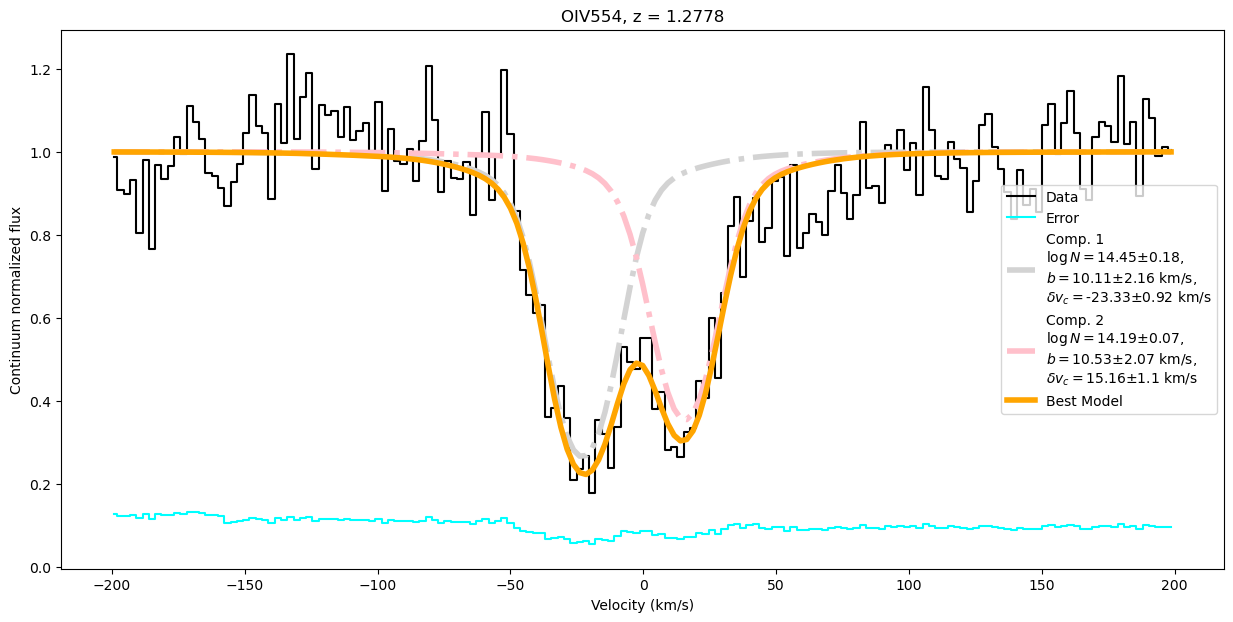

In [18]:
fig, ax = plt.subplots(1, figsize=(15, 7))

oiv_554_fuv.plot_best_profile(ax, legend=True)

In [19]:
oiv_554_fuv.result

Get OIV608 in COS FUV

In [20]:
oiv_608_fuv = ion_transition('OIV608', 121, 'FUV')

In [21]:
oiv_608_fuv.grab_ion_transition_info(ids_fits_list, atomic_data_table, delta_v = 5)

In [22]:
#oiv_608_fuv.grab_ion_transition_spec(spec_fits_list, v_range=[-154,147])
#oiv_608_fuv.grab_ion_transition_spec(spec_fits_list, v_range=[-200,200], masks=[[-200,-150],[150,200]])
oiv_608_fuv.grab_ion_transition_spec(spec_fits_list, v_range=[-200,200], masks=[[-145,-105]])

In [23]:
oiv_608_fuv.cont_norm_flux(nodes_fits_list, renorm=True, v_abs_range=[-90,110], degree=1)

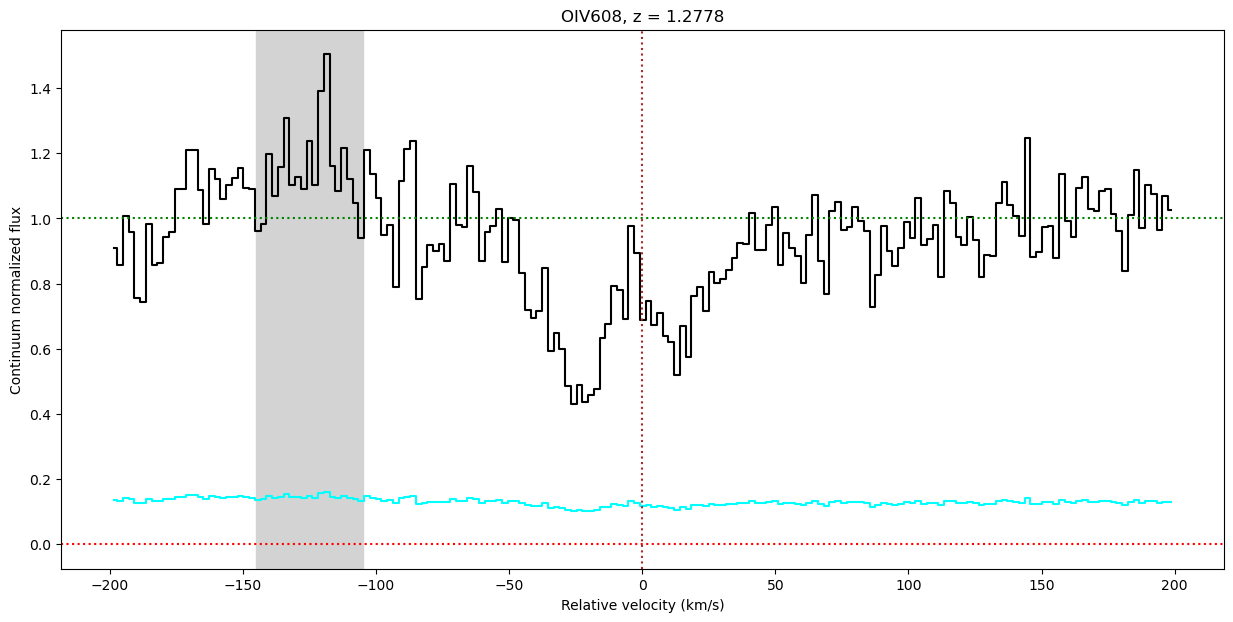

In [24]:
fig, ax = plt.subplots(1, figsize=(15,7))

oiv_608_fuv.plot_ion_transition_spec(ax)

In [25]:
oiv_608_fuv.grab_ion_transition_lsf(lsf_fits_list)

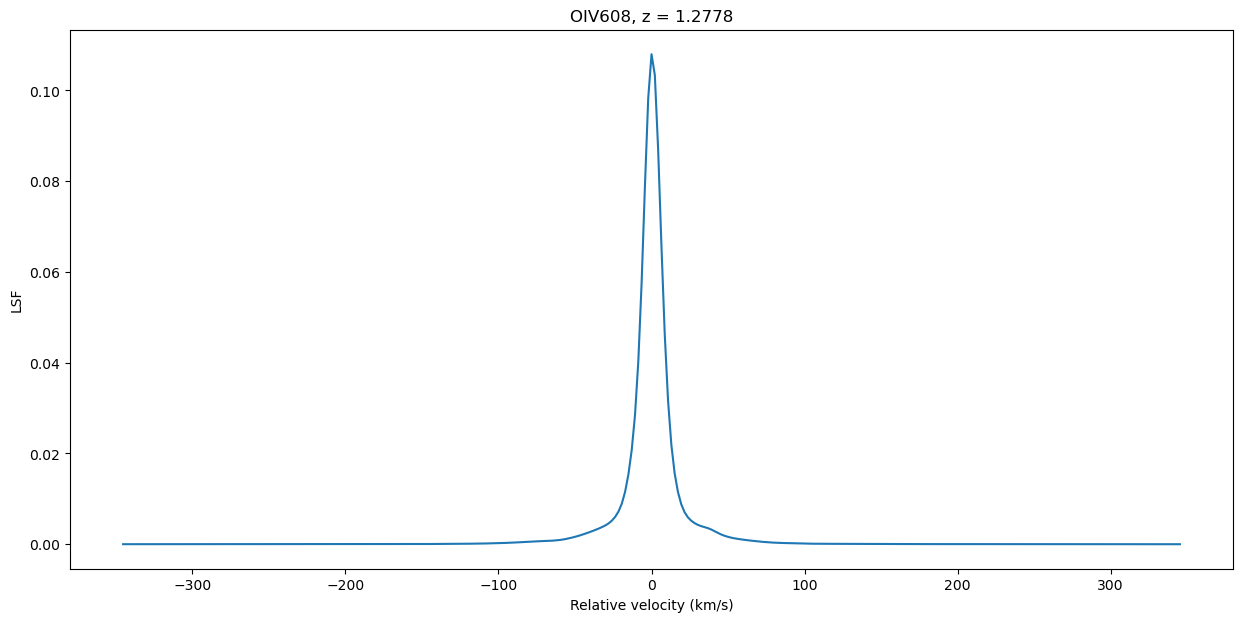

In [26]:
fig, ax = plt.subplots(1, figsize=(15, 7))

oiv_608_fuv.plot_ion_transition_lsf(ax)

In [27]:
oiv_608_fuv.init_multi_voigt(init_values = np.array([[14.4, 7, -20.5], 
                                                     [14.2, 7, 17]]), 
                             lsf_convolve = True)

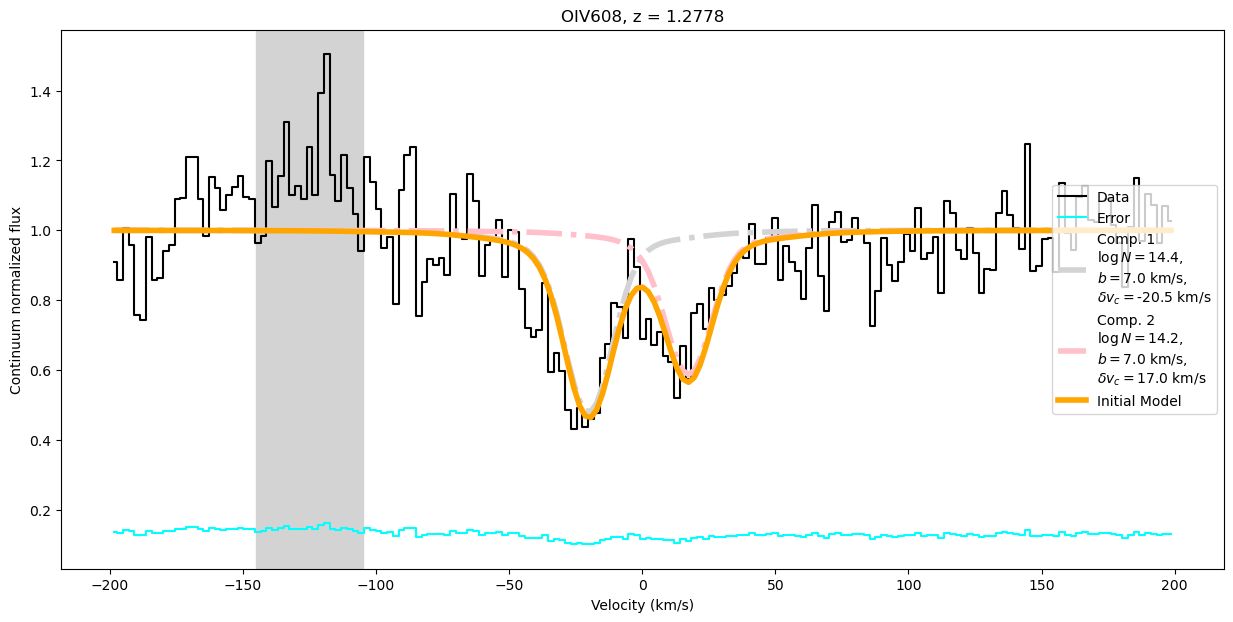

In [28]:
fig, ax = plt.subplots(1, figsize=(15, 7))

oiv_608_fuv.plot_init_profile(ax)

In [29]:
oiv_608_fuv.fit_multi_voigt()

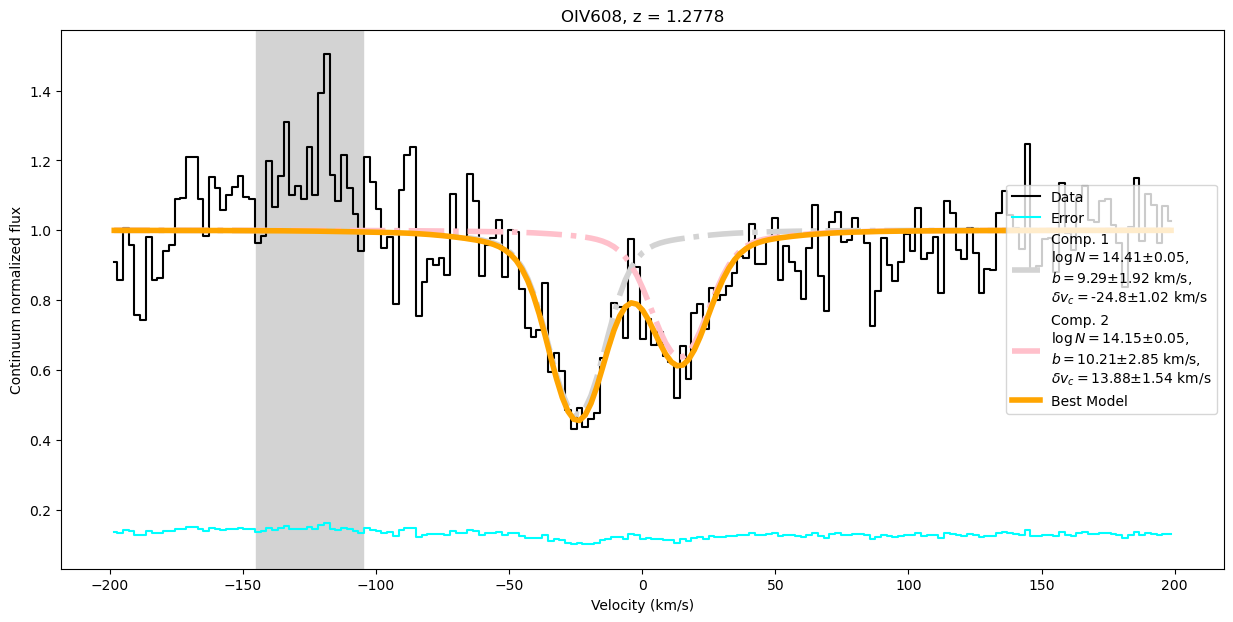

In [30]:
fig, ax = plt.subplots(1, figsize=(15, 7))

oiv_608_fuv.plot_best_profile(ax, legend=True)

In [31]:
oiv_608_fuv.result

Get OIV774 in COS FUV

In [32]:
oiv_787_fuv = ion_transition('OIV787', 121, 'FUV')

In [33]:
oiv_787_fuv.grab_ion_transition_info(ids_fits_list, atomic_data_table, delta_v=18)

In [34]:
#oiv_787_fuv.grab_ion_transition_spec(spec_fits_list, v_range=[-90,90])
#oiv_787_fuv.grab_ion_transition_spec(spec_fits_list, v_range=[-200,200], masks=[[-200,-90],[90,200]])
oiv_787_fuv.grab_ion_transition_spec(spec_fits_list, v_range=[-200,200], masks=[[-180,-100],[150,200]])
#oiv_787_fuv.grab_ion_transition_spec(spec_fits_list, v_range=[-200,200], masks=[[150,200]])

In [35]:
#oiv_787_fuv.cont_norm_flux(nodes_fits_list, renorm=True, v_abs_range=[-50,60], degree=1)
oiv_787_fuv.cont_norm_flux(nodes_fits_list, renorm=True, v_abs_range=[-50,60], degree=1)

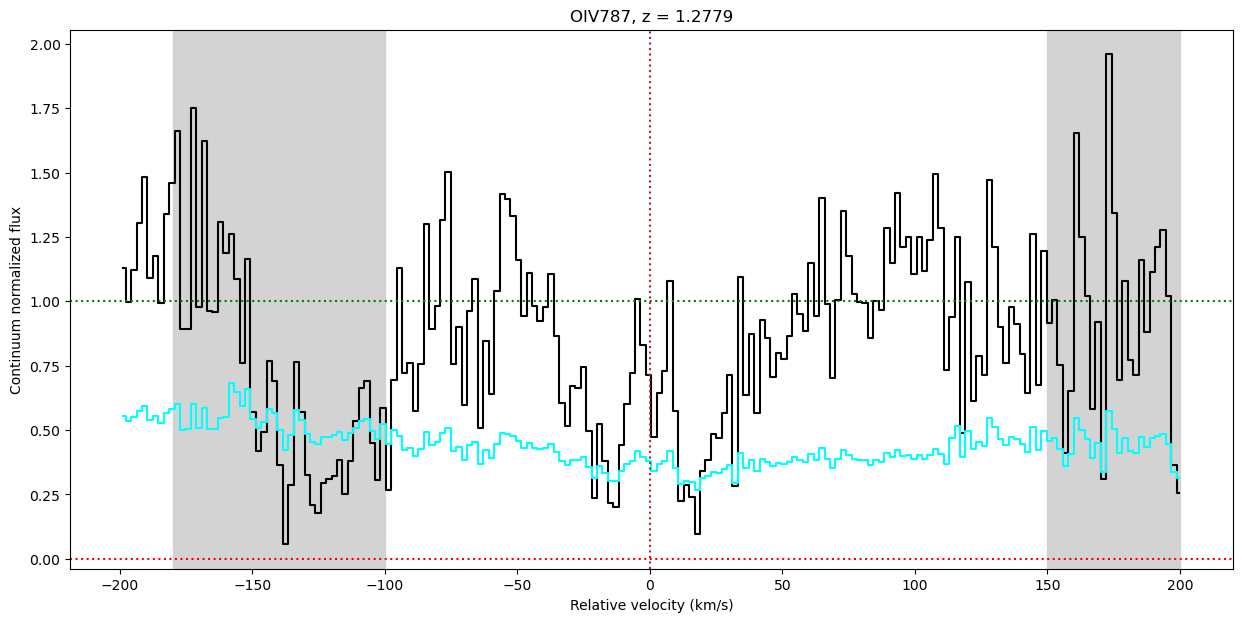

In [36]:
fig, ax = plt.subplots(1, figsize=(15,7))

oiv_787_fuv.plot_ion_transition_spec(ax)

In [37]:
oiv_787_fuv.grab_ion_transition_lsf(lsf_fits_list)

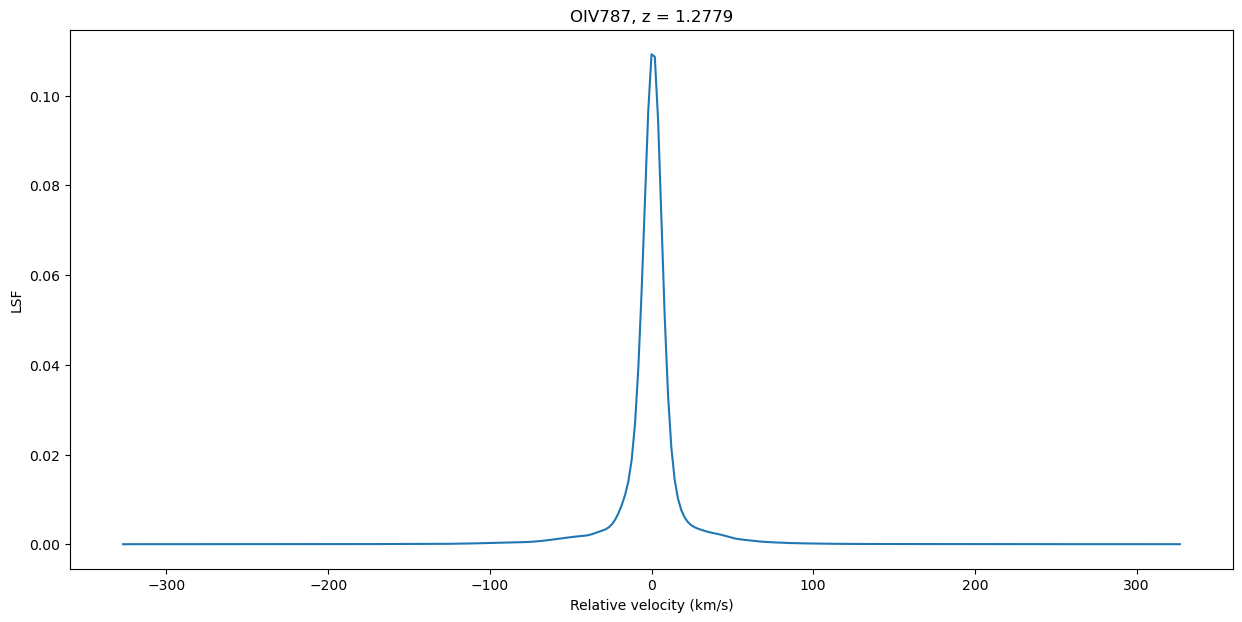

In [38]:
fig, ax = plt.subplots(1, figsize=(15, 7))

oiv_787_fuv.plot_ion_transition_lsf(ax)

In [39]:
oiv_787_fuv.init_multi_voigt(init_values = np.array([[14.4, 7, -20.5], 
                                                     [14.2, 7, 17]]), 
                             lsf_convolve = True)

#oiv_787_fuv.init_multi_voigt(init_values = np.array([[14.2, 7, -20.5], 
#                                                     [13.8, 7, 17],
#                                                     [14, 42, -127]]), 
#                             lsf_convolve = True)

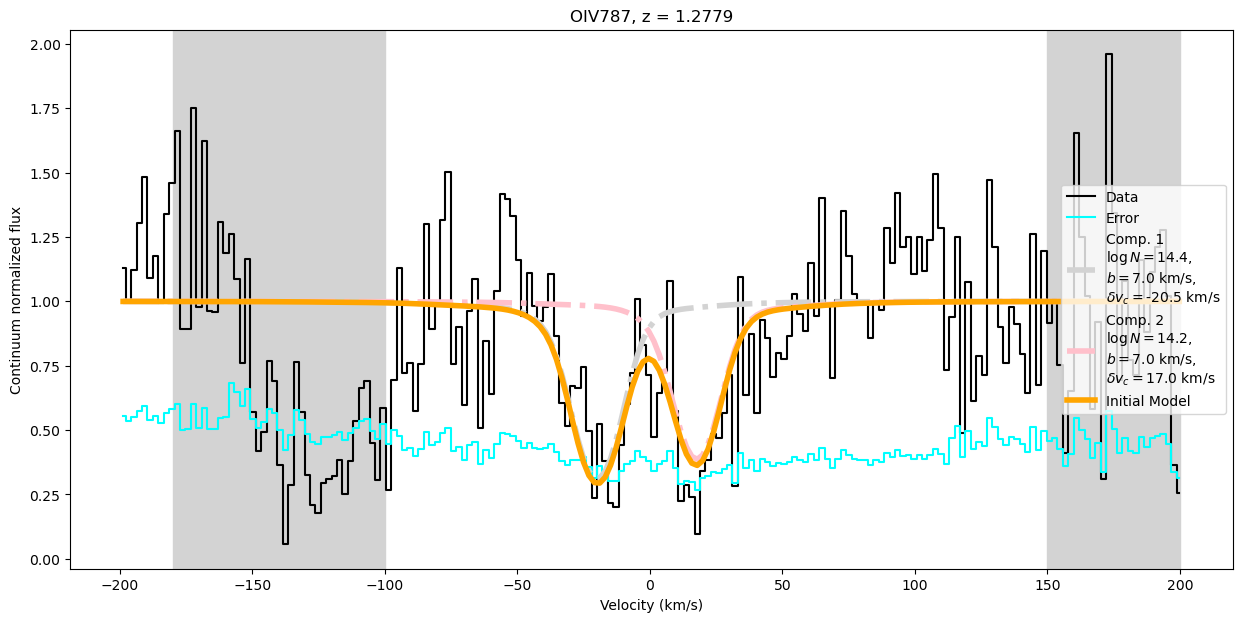

In [40]:
fig, ax = plt.subplots(1, figsize=(15, 7))

oiv_787_fuv.plot_init_profile(ax, legend=True)

In [41]:
oiv_787_fuv.fit_multi_voigt()

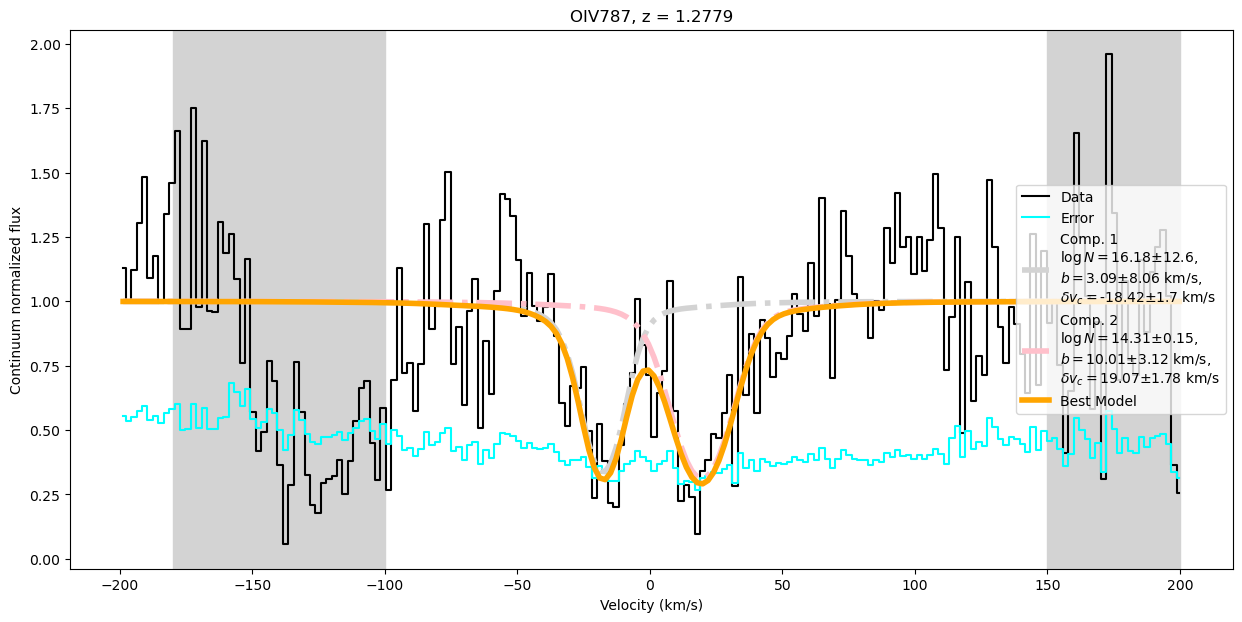

In [42]:
fig, ax = plt.subplots(1, figsize=(15, 7))

oiv_787_fuv.plot_best_profile(ax, legend=True)

In [43]:
oiv_787_fuv.result

Build a suite of ions

In [44]:
oiv = ion(1.2778, 'OIV', [oiv_554_fuv, oiv_608_fuv, oiv_787_fuv])

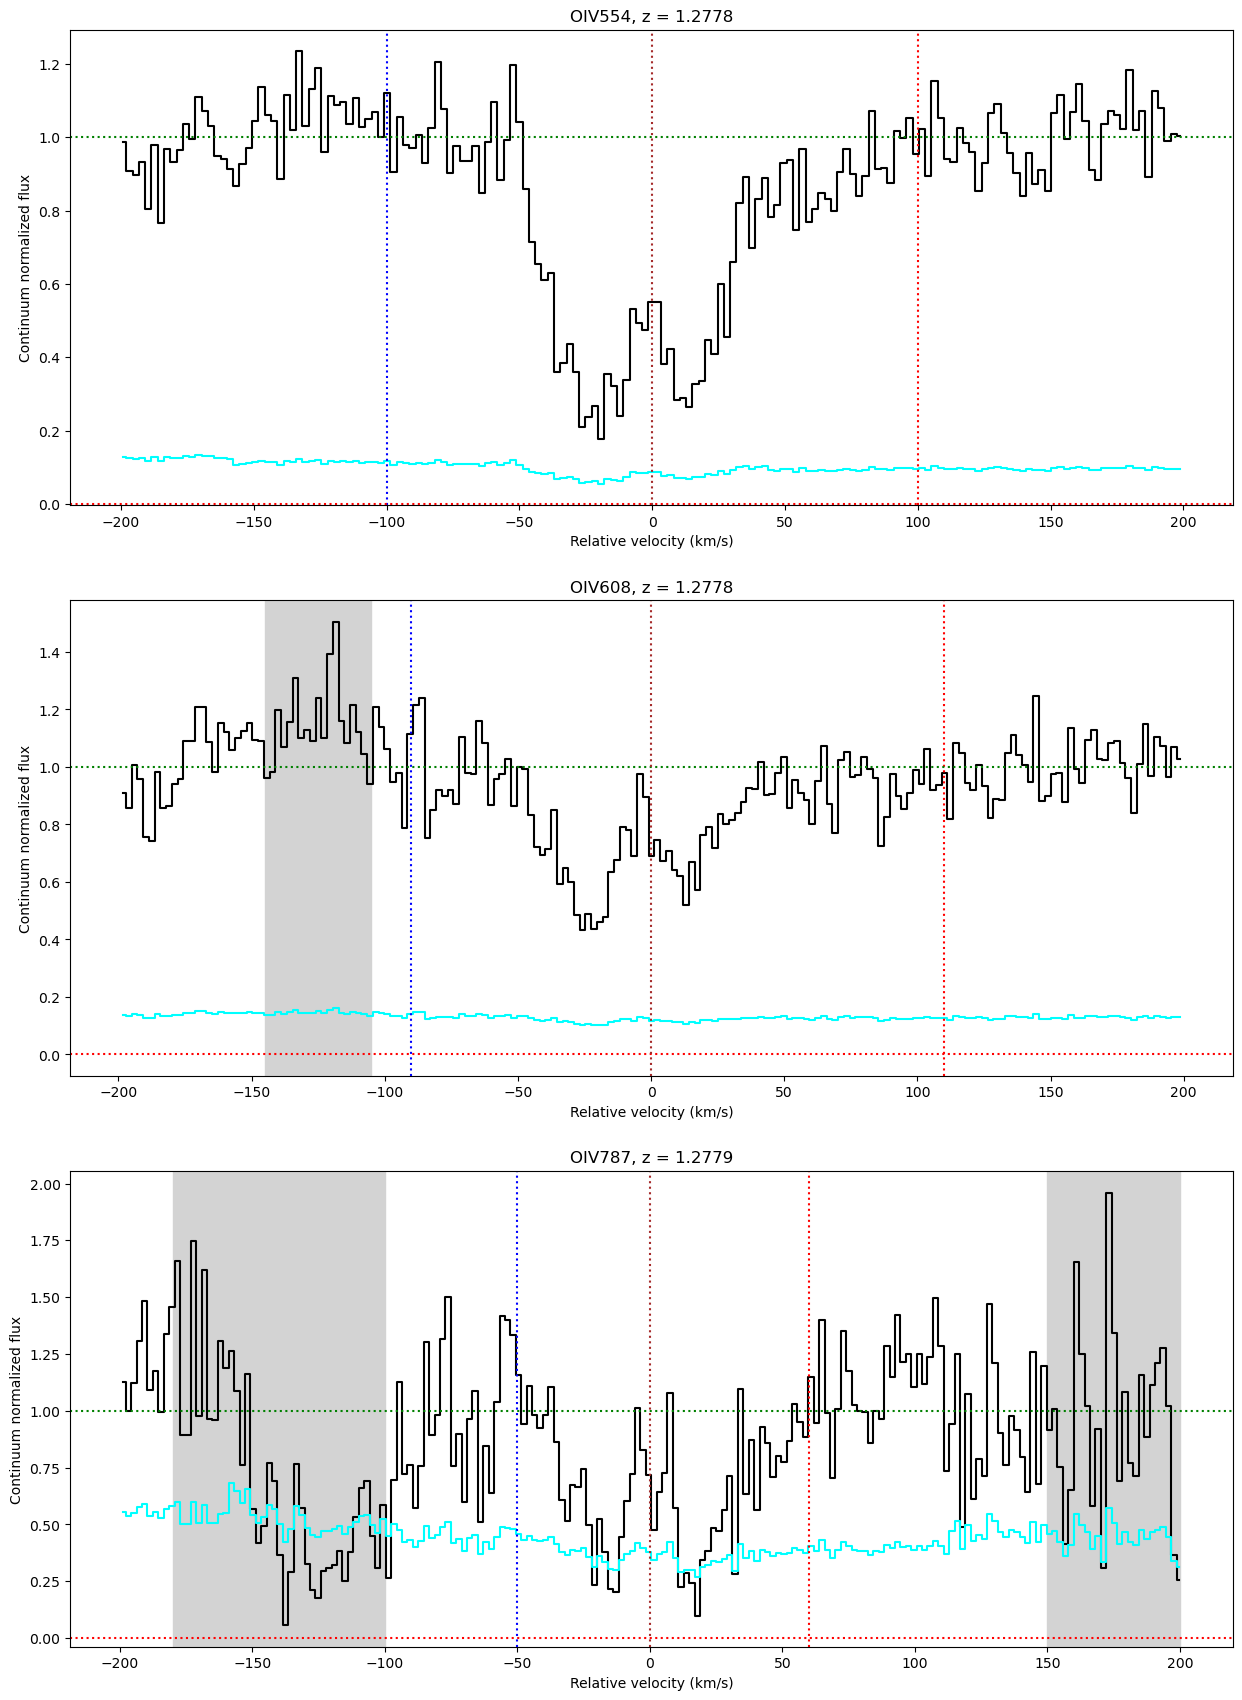

In [45]:
fig, axes = plt.subplots(3, 1, figsize=(15,21))

oiv.plot_ion(axes, draw_cont=True)

In [46]:
oiv.init_ion(np.array([[14.44, 9, -22],[14.23, 8, 15]]))

#oiv.init_ion(init_values_shared=np.array([[14.44, 9, -22],[14.23, 8, 15]]),
#             init_values_add_dict = {2:np.array([[14.31, 15.36, -122]])})

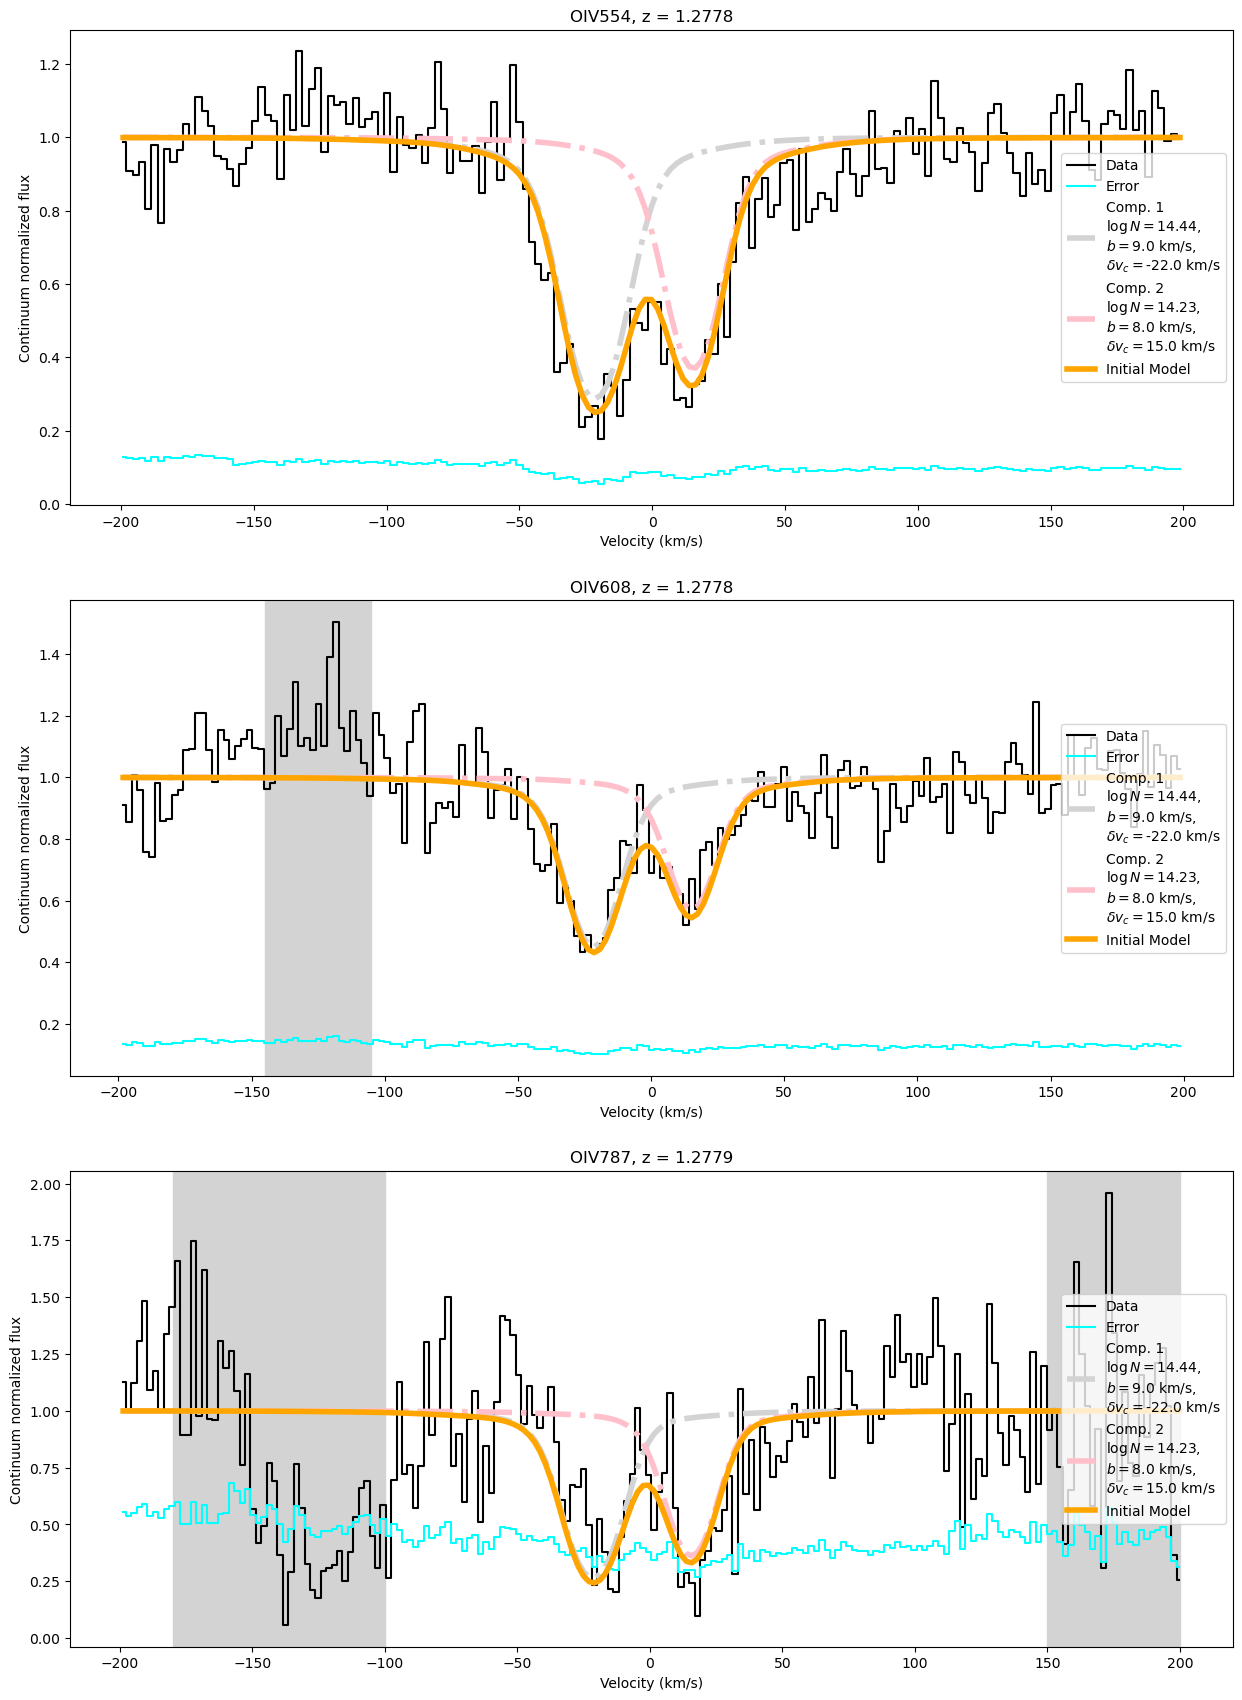

In [47]:
fig, axes = plt.subplots(3, 1, figsize=(15,21))

oiv.plot_ion_init_fit(axes, legend=True)

In [48]:
oiv.fit_ion()

In [49]:
oiv.result

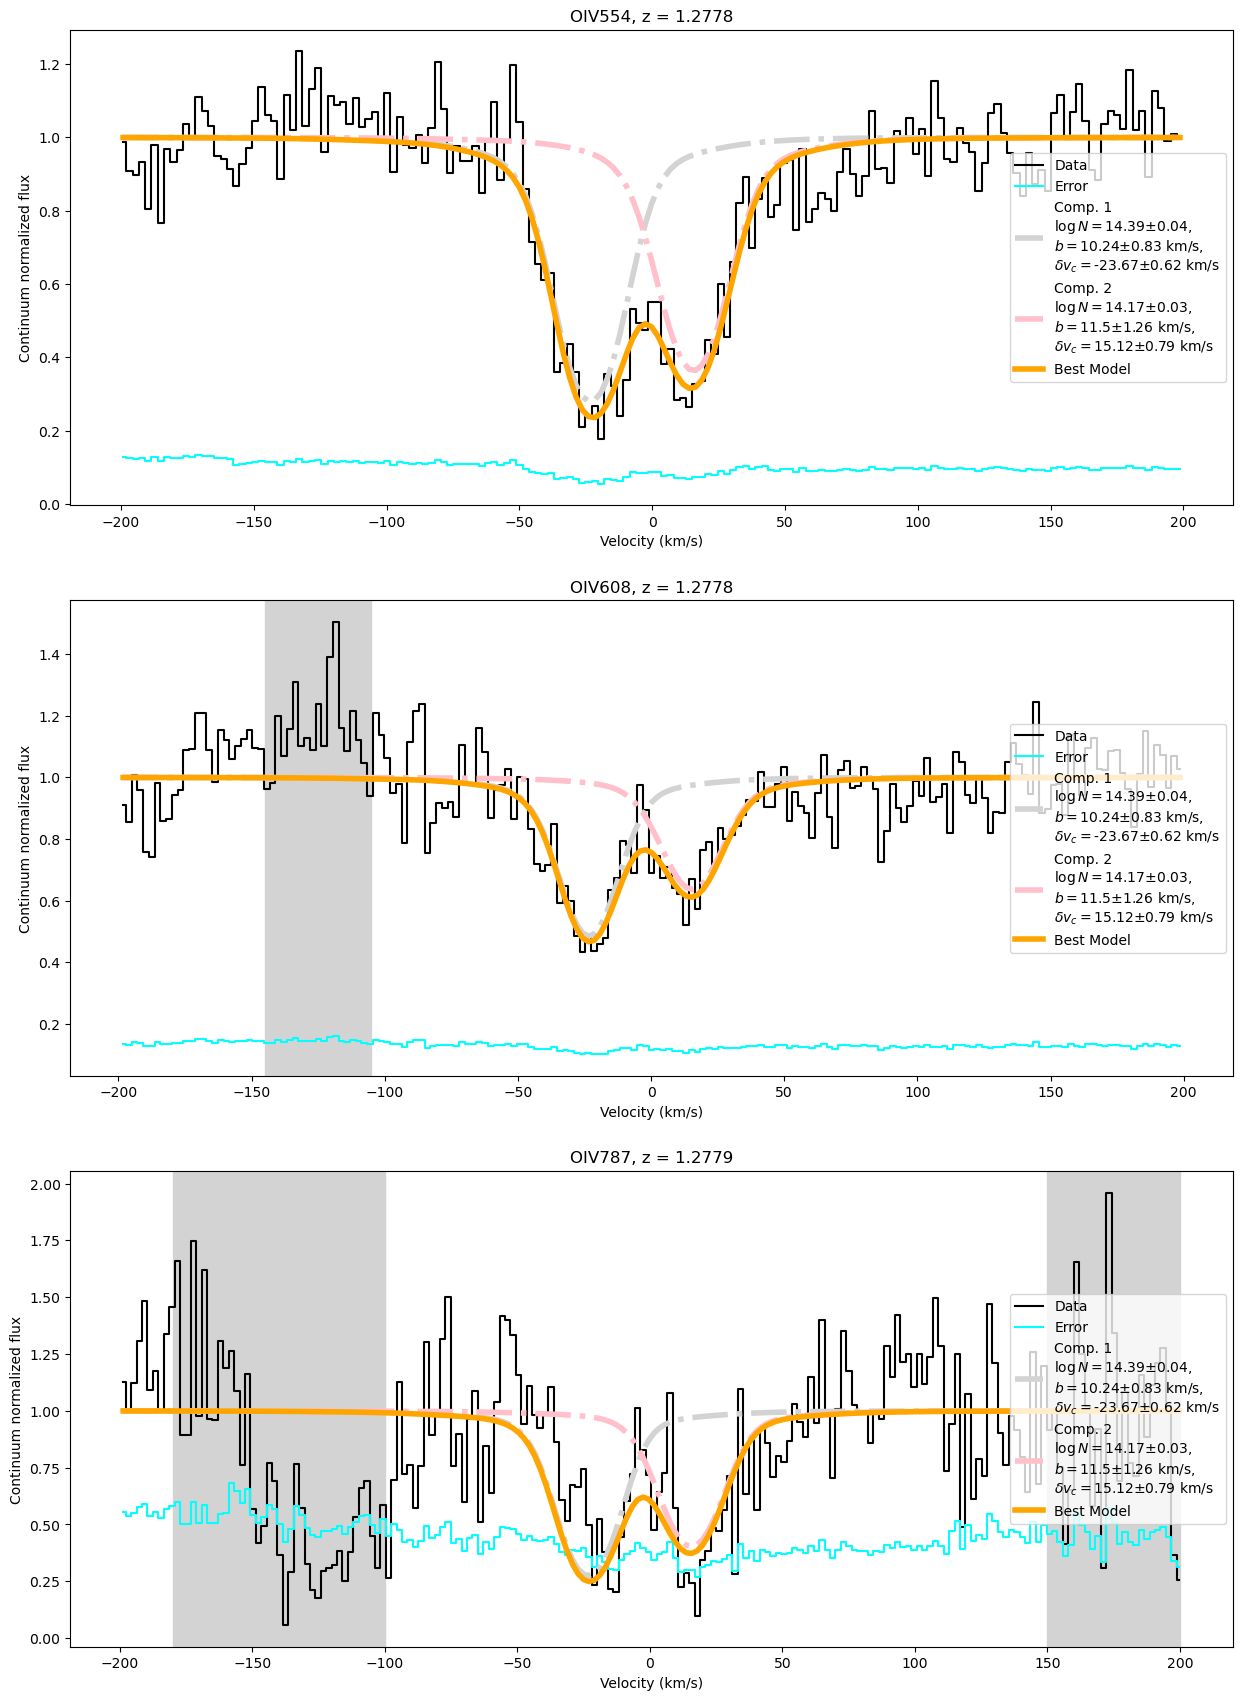

In [50]:
fig, axes = plt.subplots(3, 1, figsize=(15,21))

oiv.plot_ion_best_fit(axes, legend=True)

In [52]:
#oiv.fit_ion_emcee(loaddir=rootdir, n_steps=4000)
oiv.fit_ion_emcee(load=True, loaddir=rootdir)

In [53]:
oiv.result_emcee

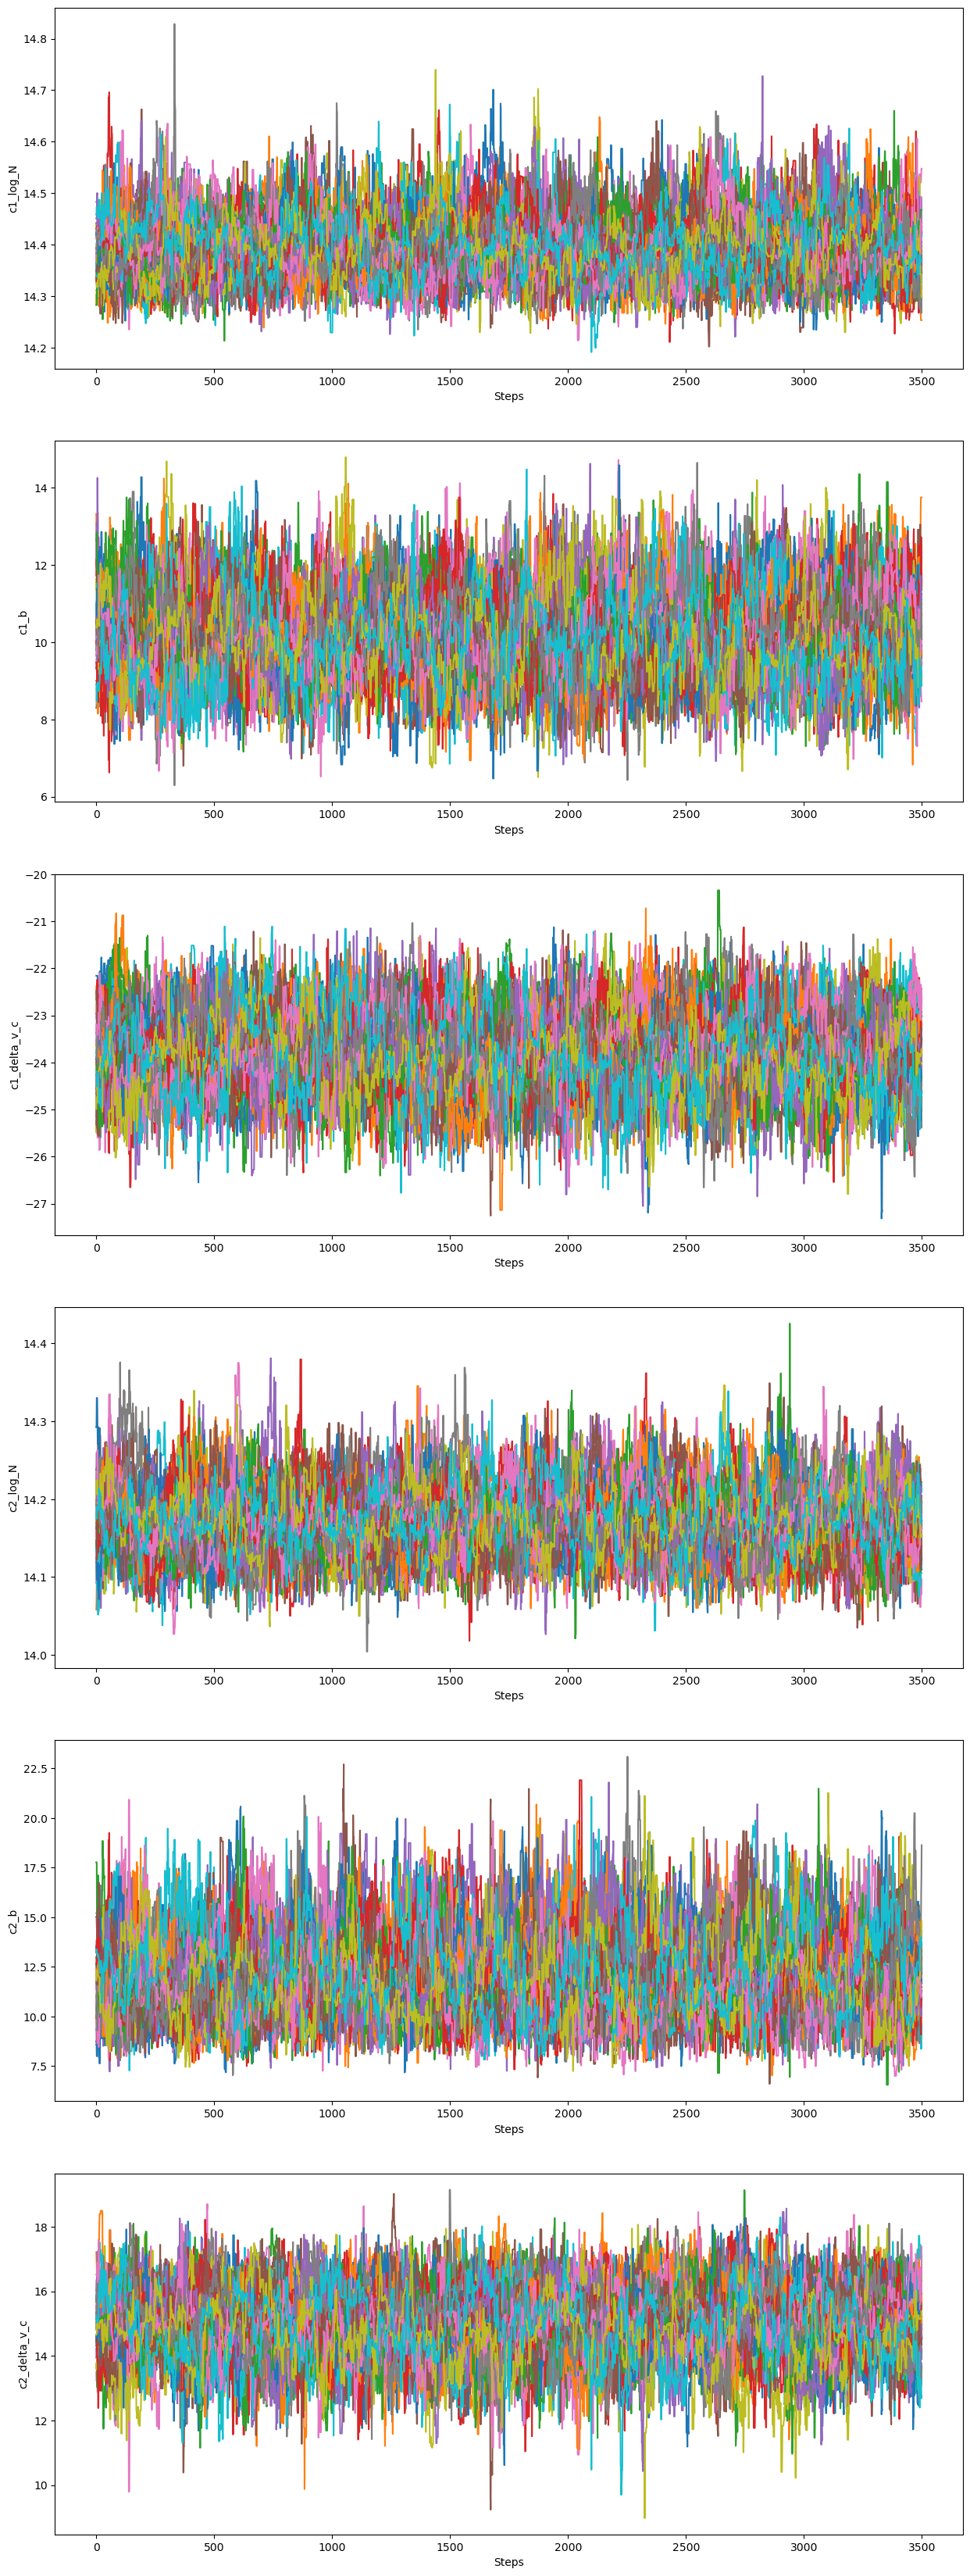

In [54]:
fig, axes = plt.subplots(6, 1, figsize=(15,7*6))

oiv.plot_chains(axes)

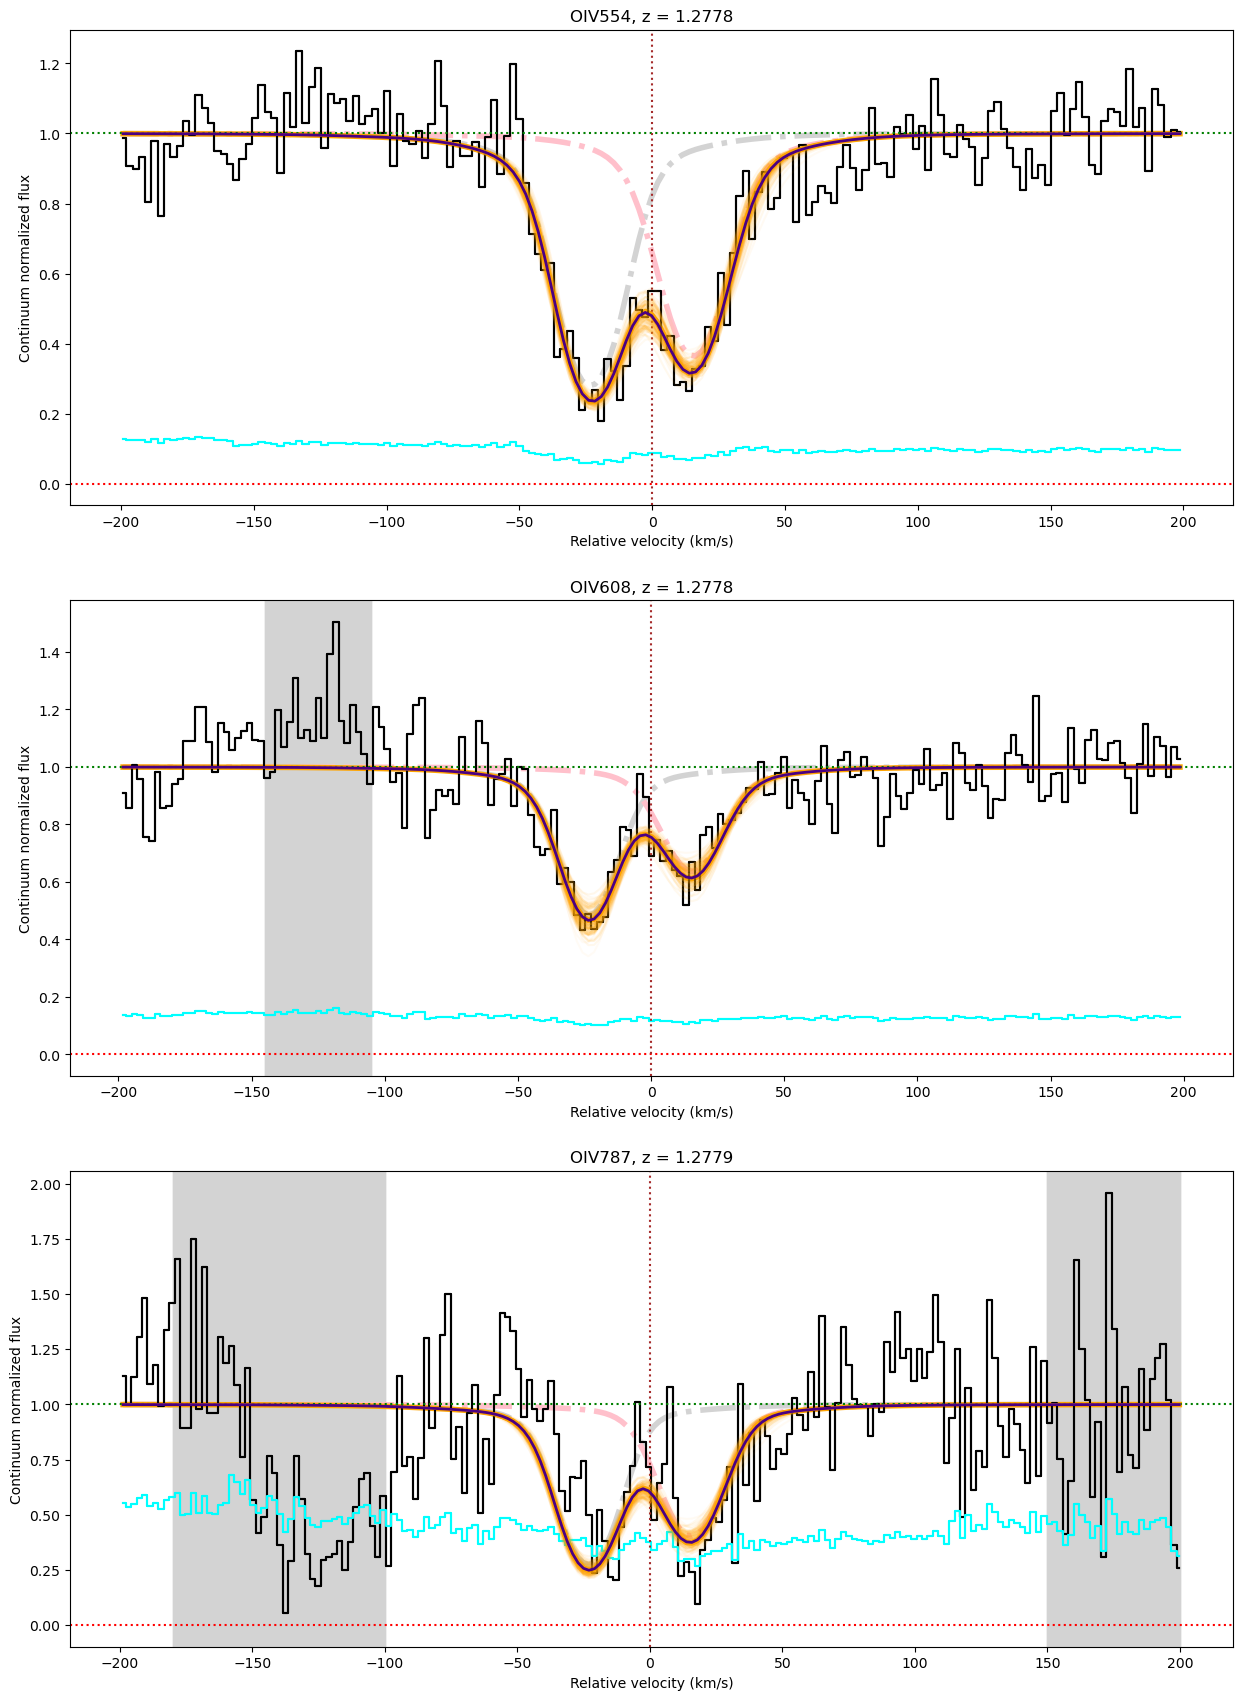

In [55]:
fig, axes = plt.subplots(3, 1, figsize=(15,21))

oiv.plot_ion_best_fit(axes)
oiv.plot_samples(axes)

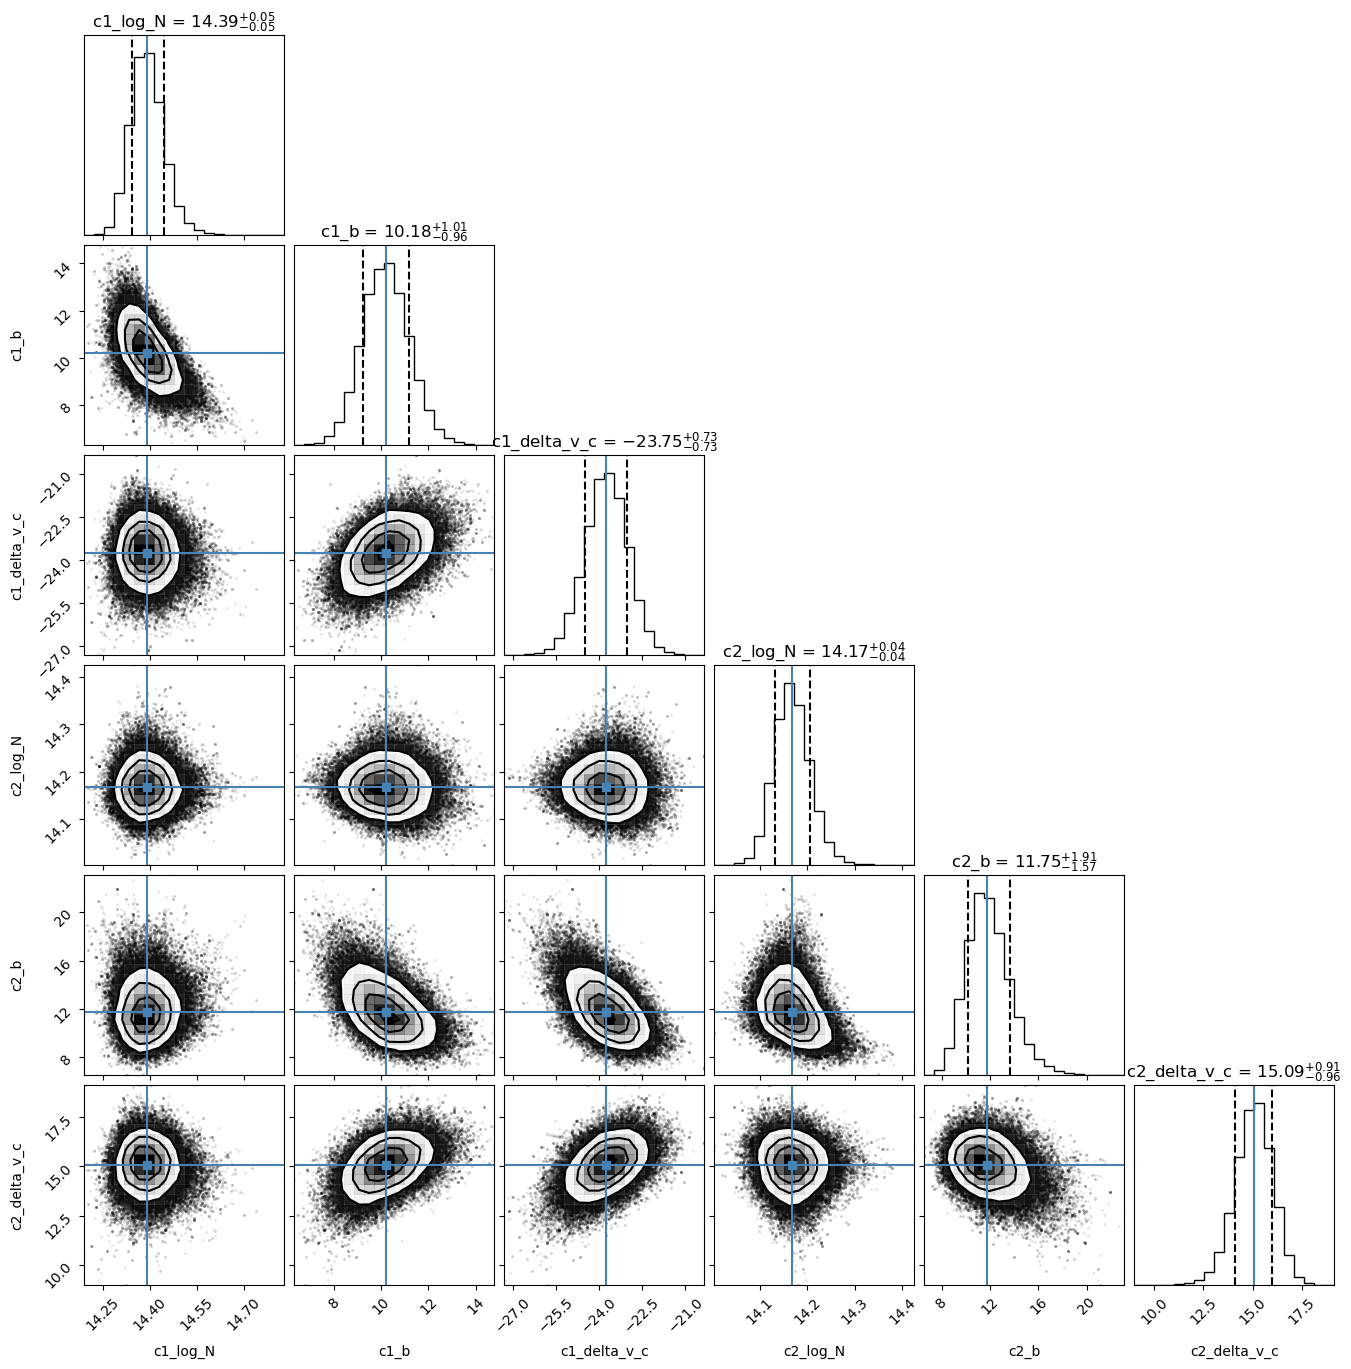

In [56]:
oiv.plot_corner()